In [1]:
# importing necessary libraries

from bs4 import BeautifulSoup
import requests 
import pandas as pd
import chardet
import matplotlib.pyplot as plt
import re
import spotipy
import spotipy.util as util
from IPython.display import display

# QUESTION1
## Information of All the articles posted on front page of techcrunch.com.

In [2]:
# Making connection to the website to fetch data using Beautiful Soup

html = requests.get("https://techcrunch.com/").text
soup1 = BeautifulSoup(html, 'html5lib')

# Accessing all the lists under specific un-ordered list by traversing HTML tree

default=soup1.find("ul",id='river1')
default1=soup1.find("ul",id='river2')
soup2=soup1.find("ul",id='river1').find_all('li')

In [3]:
# Extracting lists because information of each article is stored in these lists

x=soup1.find("ul",class_="river lc-padding").findAll('li')
y=soup1.find("ul",attrs = {'id':'river2'}).findAll('li')

In [4]:
# Extracting Information from the Articles that are shown on the front Page

titles=[]
authors=[]
times=[]
tags=[]
for i in x:
    if (i.parent==default):
        title=i.find("h2",class_='post-title').text
        titles.append(title)
        author=i.find("div",class_='byline').find("a").text
        authors.append(author)
        time=i.find("time",class_='timestamp')['datetime']
        times.append(time)
        if (i.find('a',class_='tag')):
            tag=i.div.a.text
            tags.append(tag)
        else:
            tags.append('')

for z in y:
    if (z.parent==default1):
        title=z.find("h2",class_='post-title').text
        titles.append(title)
        author=z.find("div",class_='byline').find("a").text
        authors.append(author)
        time=z.find("time",class_='timestamp')['datetime']
        times.append(time)
        if (z.find('a',class_='tag')):
            tag=z.div.a.text
            tags.append(tag)
        else:
            tags.append('')



In [5]:
# Converting the lists into dataframe

Articles = pd.DataFrame({'Articles': titles,
                       'Authors': authors,
                       'Publish Date': times,
                       'Tags': tags},index=range(1,len(tags)+1))
pd.set_option('max_colwidth',120)
display(Articles)


,Articles,Authors,Publish Date,Tags
1,"Indiegogo is now an e-tailer, too",Connie Loizos,2017-10-16 04:01:27,
2,Upload exec tasked with turning things around at the troubled VR startup has already quit,Lucas Matney,2017-10-16 02:46:24,Augmented Reality
3,Mapping the blockchain project ecosystem,Josh Nussbaum,2017-10-16 02:30:25,
4,Netflix’s original content costs are ballooning,Matthew Lynley,2017-10-16 02:18:58,
5,Alphabet’s Project Wing now delivers burritos by drone in southeastern Australia,Frederic Lardinois,2017-10-16 02:13:14,Gadgets
6,Netflix crushes its own expectations for subscription growth again,Matthew Lynley,2017-10-16 01:30:42,
7,"Facebook acquires anonymous teen compliment app tbh, will let it run",Josh Constine,2017-10-16 01:04:32,Apps
8,Google revamps its Security Checkup feature with personalized suggestions for your account,Sarah Perez,2017-10-16 01:00:50,
9,Silenced by ‘free speech’,Josh Constine,2017-10-16 12:45:34,Apps
10,The end of oversharing,John Biggs,2017-10-16 12:05:01,


#### Tags of some Articles are missing

# QUESTION2
## Find Number of datasets on US Government's open data Website

In [6]:
# Making connection to the website to fetch data using Beautiful Soup

html = requests.get("https://www.data.gov/").text
soup = BeautifulSoup(html, 'html5lib')


In [7]:
# Fetching the number of datasets available on the website

datasets=soup.find("a",href="/metrics").text
print(datasets)

197,291 datasets


# QUESTION 3
## List of US votes rejected in 115 congress by a margin of 5.

In [8]:
# Making connection to the website to fetch data using Beautiful Soup

html = requests.get("https://www.senate.gov/legislative/LIS/roll_call_lists/vote_menu_115_1.htm").text
soup4 = BeautifulSoup(html, 'html5lib')

# Accessing all rows of table
votes_table=soup4.find("table").find("tbody").findAll("tr")


In [9]:
# Extracting necessary information from all rows of table and appending them to list

issue=[]
vote_tally=[]
Result=[]
Description=[]
Date=[]
for i in votes_table:
    if i.find_all("td")[1].text=="Rejected":
        x=i.td.a.text
        x1=re.findall('\d+', x)
        y=int(x1[2])-int(x1[1])
        if -5<y<5:
            issue.append(i.find_all("td")[3].a.text)
            vote_tally.append(i.find_all("td")[0].a.text)
            Result.append(i.find_all("td")[1].text)
            Description.append(i.find_all("td")[2].text)
            Date.append(i.find_all("td")[4].text)

# Creating a dataframe from lists.

Rej_List = pd.DataFrame({'Votes(tally)':vote_tally,'Issues': issue,"Result":Result,'Question-Description':Description,
                         "Date":Date},index=(range(1,len(Date)+1)),columns=['Votes(tally)','Result','Question-Description',
                                                                            'Issues','Date'])
pd.set_option('max_colwidth',120)
display(Rej_List)

,Votes(tally),Result,Question-Description,Issues,Date
1,179 (49-51),Rejected,On the Amendment S.Amdt. 667: McConnell Amdt. No. 667; Of a perfecting nature.,H.R. 1628,Jul 28
2,178 (48-52),Rejected,"On the Motion: Murray Motion to Commit H.R. 1628 to the Committee on Health, Education, Labor and Pensions, with Ins...",H.R. 1628,Jul 28
3,174 (50-50),Rejected,On the Motion S.Amdt. 389: Motion to Waive All Applicable Budgetary Discipline Re: Strange Amdt. No. 389; To provide...,H.R. 1628,Jul 27
4,171 (48-51),Rejected,On the Motion: Casey Motion to Commit H.R. 1628 with Instructions; A bill to provide for reconciliation pursuant to ...,H.R. 1628,Jul 26
5,170 (48-52),Rejected,On the Motion: Donnelly Motion to Commit H.R. 1628 with Instructions; A bill to provide for reconciliation pursuant ...,H.R. 1628,Jul 26
6,125 (49-51),Rejected,On the Motion to Proceed: Motion to Proceed to H. J. Res. 36; A joint resolution providing for congressional disappr...,H.J.Res. 36,May 10
7,108 (48-52),Rejected,On the Motion to Adjourn: Schumer Motion to Adjourn Until 5:00 P.M.,PN55,Apr 06
8,107 (48-52),Rejected,"On the Motion to Postpone: Motion to Postpone the Motion to Invoke Cloture, Upon Reconsideration, of the Nomination ...",PN55,Apr 06
9,70 (47-51),Rejected,On the Motion: Motion to Extend Debate Re: Pruitt Nomination,PN44,Feb 17
10,25 (49-49),Rejected,On the Motion S.Amdt. 86: Motion to Waive the C.B.A. Re: Brown Amdt. No. 86; To create a point of order against legi...,S.Con.Res. 3,Jan 12


# Question 4 
## Number of Alerts and Warnings for International Travel

In [10]:
# Making connection to the website to fetch data using Beautiful Soup

html = requests.get("https://travel.state.gov/content/passports/en/alertswarnings.html").text
soup5 = BeautifulSoup(html, 'html5lib')

# Accessing all rows of table.

Ale_War=soup5.find("table").find("tbody").findAll("tr")

In [11]:
# Counting alerts and warnings by iterating through each row in a table.
Al=[]
War=[]
alerts=0
warnings=0
for i in Ale_War:
    if i.find('td').text=='Warning':
        warnings+=1
    elif i.find('td').text=='Alert':
        alerts+=1
Al.append(alerts)
War.append(warnings)
Ale_Warn=pd.DataFrame({'Alerts':Al,'Warnings':War},index=range(1,len(Al)+1))
display(Ale_Warn)

,Alerts,Warnings
1,3,42


# Question 5
## Number of female babies whose names start with 'K

In [12]:
# Making connection to the website to fetch data using Beautiful Soup

html = requests.get("https://www.ssa.gov/OACT/babynames/decades/names2010s.html").text
soup6 = BeautifulSoup(html, 'html5lib')

# Accessing all rows in a table.

babies=soup6.find("table").findAll("tbody")[2].findAll("tr")

# slicing last row from the table because this row is empty.

babies=babies[:-1]

In [13]:
# Iterating over each row and checking the criteria and then appending the names and their respective numbers to the list.
# Also, summing the number of babies names whose name starts with 'K'.

Female_k_babies=[]
Number=[]
count=0
for i in babies:
    Females=i.findAll("td")[3].text
    if ((i.findAll("td")[3].text)[0]=='K'):
        Female_k_babies.append(i.findAll("td")[3].text)
        Number.append(i.findAll("td")[4].text)
        string=i.findAll("td")[4].text
        string = string.replace(',', '')
        count+=int(string)


In [14]:
# Creating dataframe from the lists

Names_K = pd.DataFrame({'Female Names starting with K': Female_k_babies,
                        'Number of Babies by the Name':Number},index=range(1,len(Number)+1),
                       columns=['Female Names starting with K','Number of Babies by the Name'])

display(Names_K)

# converting into string to use it for concatenation in print statement
count=str(count)

# to make bold
start = "\033[1m"
end = "\033[0;0m"

print("Total Number of Babies whose Name starts with 'K' sum up to be " + start + "'" + count +"'" + end)

,Female Names starting with K,Number of Babies by the Name
1,Kaylee,"35,563"
2,Kylie,"28,631"
3,Khloe,"27,377"
4,Kennedy,"26,713"
5,Katherine,"26,091"
6,Kayla,"24,576"
7,Kimberly,"22,132"
8,Kendall,"16,392"
9,Kaitlyn,"15,877"
10,Kinsley,"14,793"


Total Number of Babies whose Name starts with 'K' sum up to be '276214'


# Question 6
## Scatter Plot of Energy vs Valence for 591 songs. Spotify API is used to extract the features of each song

In [15]:
# Making connection to Spotify API by entering the credentials.

token=util.prompt_for_user_token(username='atahir866',scope='playlist-modify-public',client_id='6961ebcf3f6f47bf8a8945c632cb4079',client_secret='800a604d93a54c8f8644114fdefc7e46',redirect_uri='http://mysite.com/callback/')
spotify = spotipy.Spotify(auth=token)

In [16]:
# Reading songs file into pandas dataframe.

with open('song-list (1).csv', 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large
songs_list=pd.read_csv('song-list (1).csv', encoding=result['encoding'])
songs_list

# Fetching only the songs name column from the dataframe.

Songs_title=songs_list['Title']

In [17]:
# Iterating through the songs name column and searching that song name by accesing SPOTIFY API and saving the response in a list.
# Response contains all the relevany information of the song.
# In this case, just extarcting URI of each song and appending it in INFO list.

info=[]
for i in Songs_title:
    results = spotify.search(i, limit=1)
    for x, t in enumerate(results['tracks']['items']):
        if t['uri']:
            info.append(t['uri'])        
        else:
            info.append('')

In [25]:
# Searching Song features by its URI and then appending them to the dataframe.

features=[]
song_attDF=pd.DataFrame()
for x in info:
    y=spotify.audio_features(x)
    song_attDF=song_attDF.append(y)


In [26]:
# displaying song features of each song
display(song_attDF)

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
0,0.03580,https://api.spotify.com/v1/audio-analysis/3LmvfNUQtglbTrydsdIqFU,0.838,201400,0.469,3LmvfNUQtglbTrydsdIqFU,0.000000,0,0.0928,-7.992,1,0.0835,139.975,4,https://api.spotify.com/v1/tracks/3LmvfNUQtglbTrydsdIqFU,audio_features,spotify:track:3LmvfNUQtglbTrydsdIqFU,0.7700
0,0.01830,https://api.spotify.com/v1/audio-analysis/5rb9QrpfcKFHM1EUbSIurX,0.894,250373,0.791,5rb9QrpfcKFHM1EUbSIurX,0.000000,2,0.0388,-4.699,1,0.1120,105.018,4,https://api.spotify.com/v1/tracks/5rb9QrpfcKFHM1EUbSIurX,audio_features,spotify:track:5rb9QrpfcKFHM1EUbSIurX,0.5940
0,0.21400,https://api.spotify.com/v1/audio-analysis/31x4wWBghN7f5PiEZUmcAW,0.471,170200,0.848,31x4wWBghN7f5PiEZUmcAW,0.000018,6,0.6580,-5.355,1,0.0538,161.049,4,https://api.spotify.com/v1/tracks/31x4wWBghN7f5PiEZUmcAW,audio_features,spotify:track:31x4wWBghN7f5PiEZUmcAW,0.3190
0,0.00704,https://api.spotify.com/v1/audio-analysis/5Z01UMMf7V1o0MzF86s6WJ,0.698,326467,0.732,5Z01UMMf7V1o0MzF86s6WJ,0.000647,2,0.3590,-4.522,1,0.2660,171.431,4,https://api.spotify.com/v1/tracks/5Z01UMMf7V1o0MzF86s6WJ,audio_features,spotify:track:5Z01UMMf7V1o0MzF86s6WJ,0.0672
0,0.48400,https://api.spotify.com/v1/audio-analysis/1BifP2JltBQO3ROccXVTis,0.800,218363,0.621,1BifP2JltBQO3ROccXVTis,0.000002,6,0.1030,-3.887,0,0.2450,98.094,4,https://api.spotify.com/v1/tracks/1BifP2JltBQO3ROccXVTis,audio_features,spotify:track:1BifP2JltBQO3ROccXVTis,0.8400
0,0.21100,https://api.spotify.com/v1/audio-analysis/0ARK753YaiJbpLUk7z5yIM,0.725,289173,0.534,0ARK753YaiJbpLUk7z5yIM,0.000029,2,0.2210,-8.364,0,0.1670,168.119,4,https://api.spotify.com/v1/tracks/0ARK753YaiJbpLUk7z5yIM,audio_features,spotify:track:0ARK753YaiJbpLUk7z5yIM,0.6160
0,0.35800,https://api.spotify.com/v1/audio-analysis/6zMUIb4uce1CzpbjR3vMdN,0.477,227387,0.728,6zMUIb4uce1CzpbjR3vMdN,0.000000,0,0.1100,-5.710,1,0.0831,89.209,4,https://api.spotify.com/v1/tracks/6zMUIb4uce1CzpbjR3vMdN,audio_features,spotify:track:6zMUIb4uce1CzpbjR3vMdN,0.7060
0,0.04060,https://api.spotify.com/v1/audio-analysis/3XKIUb7HzIF1Vu9usunMzc,0.777,261973,0.601,3XKIUb7HzIF1Vu9usunMzc,0.002010,2,0.0348,-5.931,1,0.1260,97.911,4,https://api.spotify.com/v1/tracks/3XKIUb7HzIF1Vu9usunMzc,audio_features,spotify:track:3XKIUb7HzIF1Vu9usunMzc,0.6820
0,0.02230,https://api.spotify.com/v1/audio-analysis/1PS1QMdUqOal0ai3Gt7sDQ,0.638,207627,0.699,1PS1QMdUqOal0ai3Gt7sDQ,0.000000,1,0.0917,-5.540,0,0.3840,92.939,4,https://api.spotify.com/v1/tracks/1PS1QMdUqOal0ai3Gt7sDQ,audio_features,spotify:track:1PS1QMdUqOal0ai3Gt7sDQ,0.6810
0,0.23500,https://api.spotify.com/v1/audio-analysis/3ibKnFDaa3GhpPGlOUj7ff,0.656,256733,0.578,3ibKnFDaa3GhpPGlOUj7ff,0.000000,7,0.1180,-8.970,0,0.0922,94.514,4,https://api.spotify.com/v1/tracks/3ibKnFDaa3GhpPGlOUj7ff,audio_features,spotify:track:3ibKnFDaa3GhpPGlOUj7ff,0.5720


### There are 2 missing values in the data set. 2 songs were not found. There are total 591 songs and features of 589 songs are found.

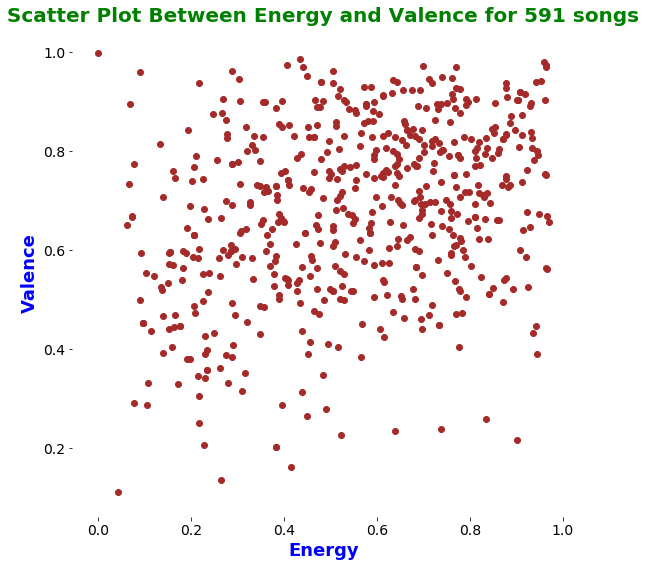

In [20]:
# Extracting Energy and Valence column from the dataframe.

valence=song_attDF['valence']
energy=song_attDF['energy']

# resize graph
plt.figure(figsize=(9,9))

# remove plot frame lines
ax = plt.subplot(111)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)

# show tick marks on bottom and left
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()


# set fontsize=14 for tick marks
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

# set labels for x and y axis
plt.xlabel("Energy",color='blue',fontsize=18,fontweight='bold')
plt.ylabel("Valence",color='blue',fontsize=18,fontweight='bold')

# set title for plot
plt.title("Scatter Plot Between Energy and Valence for 591 songs",color='green',fontsize=20,fontweight='bold',)

# Plotting Scatter plot for energy and valence for all the songs.
plt.scatter(valence,energy,c='brown')
plt.show()